In [113]:

import pandas as pd

data= pd.read_csv("C:\\Users\\NANDAKISHORE BOINI\\OneDrive\\Desktop\\anime.csv")
data


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [114]:
data.shape


(12294, 7)

In [115]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [116]:
# Check for missing values in the DataFrame
print(data.isnull().sum())

# Handle missing values (e.g., by dropping rows or filling with mean/median)
# Example: Drop rows with any missing values
data = data.dropna()



anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [117]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the dataset
print(data.describe())  # Basic statistics for numerical columns
print(data.info())  # Data types and non-null counts for each column

# Check for missing values
print(data.isnull().sum())




           anime_id        rating       members
count  12017.000000  12017.000000  1.201700e+04
mean   13638.001165      6.478264  1.834888e+04
std    11231.076675      1.023857  5.537250e+04
min        1.000000      1.670000  1.200000e+01
25%     3391.000000      5.890000  2.250000e+02
50%     9959.000000      6.570000  1.552000e+03
75%    23729.000000      7.180000  9.588000e+03
max    34519.000000     10.000000  1.013917e+06
<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB
None
anime_id    0
name        0
genre       0
typ

In [118]:
# Explore categorical features
for column in data.select_dtypes(include=['object']).columns:
  print(f"Unique values in {column}: {data[column].unique()}")
  print(data[column].value_counts())

Unique values in name: ['Kimi no Na wa.' 'Fullmetal Alchemist: Brotherhood' 'Gintama°' ...
 'Violence Gekiga David no Hoshi'
 'Violence Gekiga Shin David no Hoshi: Inma Densetsu'
 'Yasuji no Pornorama: Yacchimae!!']
name
Shi Wan Ge Leng Xiaohua                                                                            2
Saru Kani Gassen                                                                                   2
CCW: Crazy Clay Wrestling                                                                          1
Crayon Angel                                                                                       1
Koumon-teki Juuku Ketsujiru Juke                                                                   1
                                                                                                  ..
Bakusou Kyoudai Let&#039;s &amp; Go!! WGP Bousou Mini Yonku Daitsuiseki                            1
Beet the Vandel Buster Excellion                                        

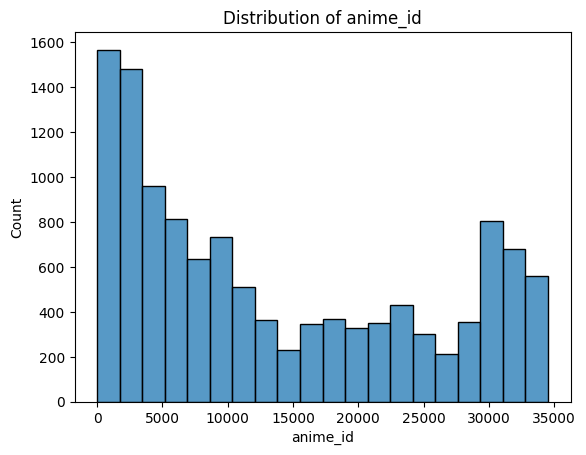

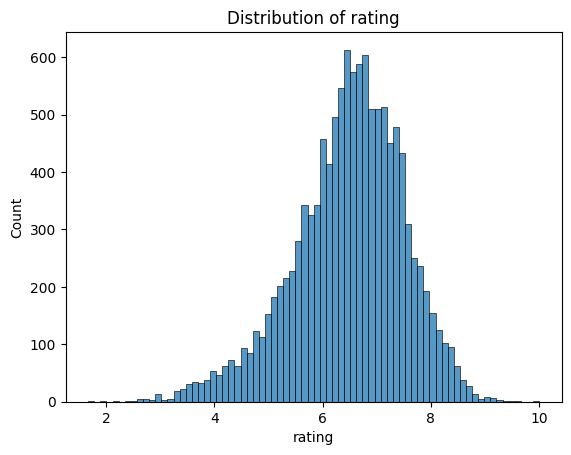

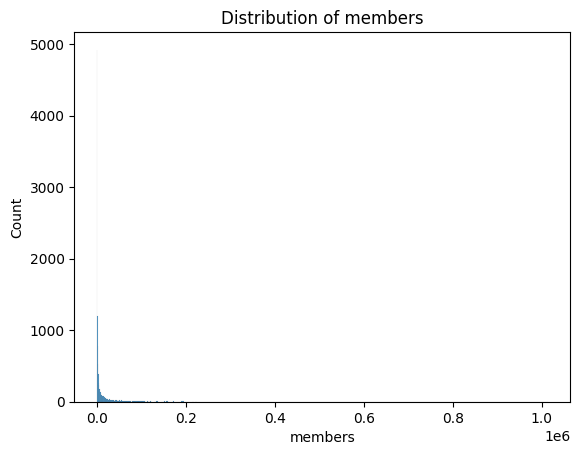

In [119]:
# Visualize distributions of numerical features
for column in data.select_dtypes(include=['number']).columns:
  plt.figure()
  sns.histplot(data[column])
  plt.title(f"Distribution of {column}")
  plt.show()


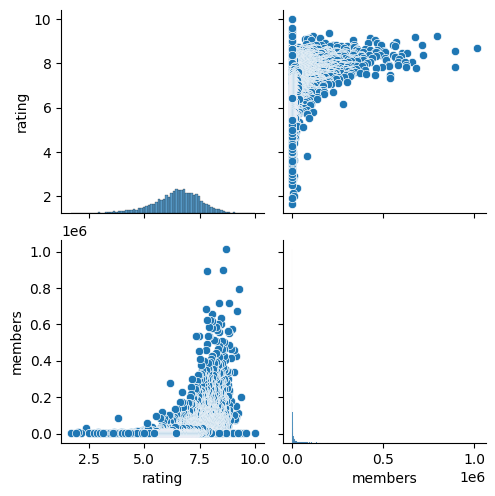

In [120]:
# Explore relationships between features
sns.pairplot(data[['rating', 'members', 'episodes']])
plt.show()

In [121]:
# Convert relevant columns to numeric type before calculating correlation
# Identify columns with potential non-numeric values
for column in data.columns:
  if data[column].dtype == 'object':
    try:
      # Attempt to convert the column to numeric type
      data[column] = pd.to_numeric(data[column])
    except ValueError:
      print(f"Column '{column}' could not be converted to numeric.")

Column 'name' could not be converted to numeric.
Column 'genre' could not be converted to numeric.
Column 'type' could not be converted to numeric.
Column 'episodes' could not be converted to numeric.


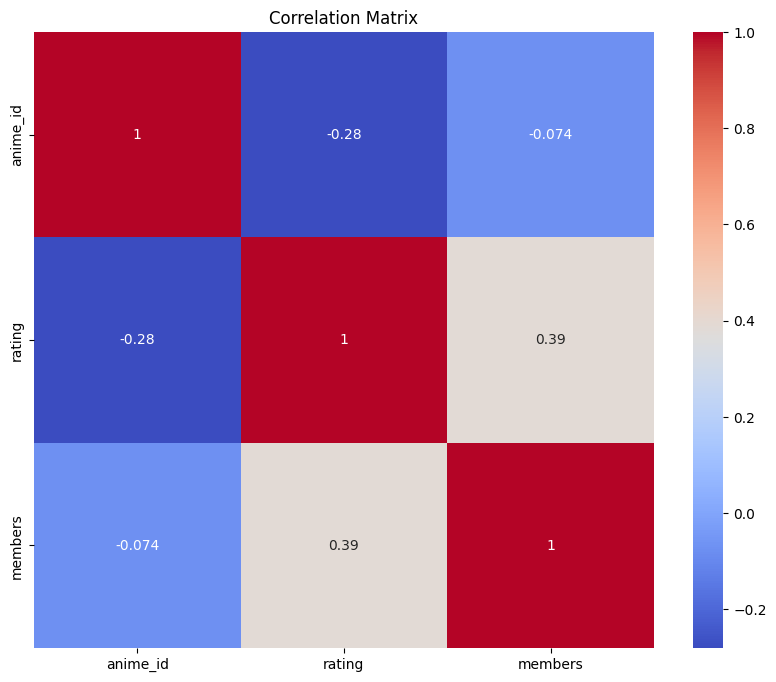

In [122]:
# Correlation matrix
# Exclude non-numeric columns from correlation calculation
correlation_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


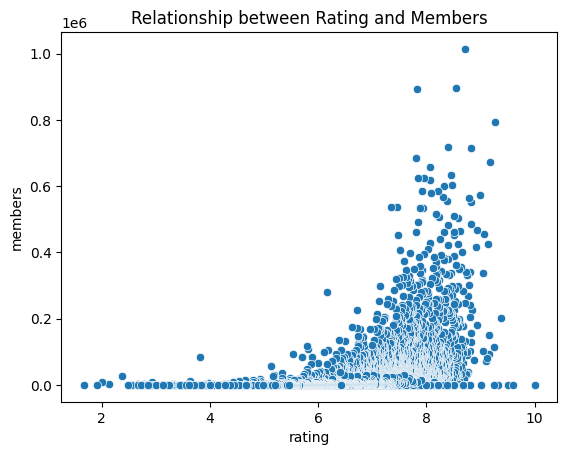

In [123]:
# You can explore specific relationships further
# For example, to see the relationship between rating and members
plt.figure()
sns.scatterplot(x='rating', y='members', data=data)
plt.title('Relationship between Rating and Members')
plt.show()


In [124]:
# Example: Analyze the top-rated anime
top_rated_anime = data.sort_values('rating', ascending=False).head(10)
print(top_rated_anime)

# Example: Analyze the anime with the most members
most_members_anime = data.sort_values('members', ascending=False).head(10)
print(most_members_anime)

       anime_id                                     name  \
10464     33662  Taka no Tsume 8: Yoshida-kun no X-Files   
10400     30120              Spoon-hime no Swing Kitchen   
9595      23005                         Mogura no Motoro   
0         32281                           Kimi no Na wa.   
9078      33607                             Kahei no Umi   
1          5114         Fullmetal Alchemist: Brotherhood   
10786     26313          Yakusoku: Africa Mizu to Midori   
2         28977                                 Gintama°   
3          9253                              Steins;Gate   
4          9969                            Gintama&#039;   

                                                   genre   type episodes  \
10464                                     Comedy, Parody  Movie        1   
10400                                    Adventure, Kids     TV  Unknown   
9595                                       Slice of Life  Movie        1   
0                   Drama, Romance,

In [125]:
# Check the unique values for categorical features
for column in data.columns:
  if data[column].dtype == 'object':
    print(f"Unique values for {column}: {data[column].unique()}")


Unique values for name: ['Kimi no Na wa.' 'Fullmetal Alchemist: Brotherhood' 'Gintama°' ...
 'Violence Gekiga David no Hoshi'
 'Violence Gekiga Shin David no Hoshi: Inma Densetsu'
 'Yasuji no Pornorama: Yacchimae!!']
Unique values for genre: ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Action, Comedy, Hentai, Romance, Supernatural' 'Hentai, Sports'
 'Hentai, Slice of Life']
Unique values for type: ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA']
Unique values for episodes: ['1' '64' '51' '24' '10' '148' '110' '13' '201' '25' '22' '75' '4' '26'
 '12' '27' '43' '74' '37' '2' '11' '99' 'Unknown' '39' '101' '47' '50'
 '62' '33' '112' '23' '3' '94' '6' '8' '14' '7' '40' '15' '203' '77' '291'
 '120' '102' '96' '38' '79' '175' '103' '70' '153' '45' '5' '21' '63' '52'
 '28' '145' '36' '69' '60' '178' '114' '35' '61' '34' '109' '20' '9' '49'
 '366' '97' '48' '78' '358' '15

In [126]:
# For example, we could use the following features for computing similarity:
features_for_similarity = ['genre', 'type', 'rating', 'members']
features_for_similarity


['genre', 'type', 'rating', 'members']

In [127]:
import pandas as pd
# Convert categorical features to numerical representations using one-hot encoding
# Check the actual column names in the DataFrame
print(data.columns)

# Assuming 'source' is actually named 'Source'
data = pd.get_dummies(data, columns=['type', 'genre'], dummy_na=True)


Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


In [129]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv("C:\\Users\\NANDAKISHORE BOINI\\OneDrive\\Desktop\\anime.csv")
#data['genre'] = data['genre'].fillna('')
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [130]:

from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd

data['genre'] = data['genre'].fillna(pd.NA)
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [131]:
### building a recommendation system with cosine similarity

# Create a binary genre matrix
# Exclude NaN values from the genre column and handle strings
genres = set(genre for sublist in data['genre'].dropna() if isinstance(sublist, str) for genre in sublist.split(', '))
for genre in genres:
    data[genre] = data['genre'].apply(lambda x: 1 if isinstance(x, str) and genre in x.split(', ') else 0)



 #Drop unnecessary columns
data.drop(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], axis=1, inplace=True)

# Calculate cosine similarity between items (anime)
item_similarity = cosine_similarity(data)

# Convert the cosine similarity matrix into a DataFrame
item_similarity_df = pd.DataFrame(item_similarity, index=data.index, columns=data.index)

def get_similar_anime(anime_id, top_n=5):
    # Get similarity scores for the given anime
    similar_anime = item_similarity_df.loc[anime_id].sort_values(ascending=False)[1:top_n+1]
    return similar_anime

# Example usage:
similar_anime = get_similar_anime(anime_id=60, top_n=5)
print(similar_anime)

5438    0.894427
5031    0.866025
676     0.866025
4514    0.866025
5119    0.866025
Name: 60, dtype: float64


In [132]:
# Experiment with different threshold values for similarity scores to adjust the recommendation list size.

def recommend_similar_anime(target_anime_id, similarity_threshold=0.5, top_n=10):

  # Get similarity scores for the target anime
  similar_anime = item_similarity_df.loc[target_anime_id].sort_values(ascending=False)

  # Filter anime based on the similarity threshold
  recommendations = similar_anime[similar_anime >= similarity_threshold]

  # Return the top N recommendations
  return recommendations.head(top_n)

# Example usage:
target_anime_id = 60  # Replace with the ID of the target anime
recommendations = recommend_similar_anime(target_anime_id, similarity_threshold=0.7, top_n=5)
print(f"Recommendations for anime ID {target_anime_id}:")
print(recommendations)


Recommendations for anime ID 60:
60      1.000000
5438    0.894427
5031    0.866025
676     0.866025
4514    0.866025
Name: 60, dtype: float64


In [133]:

from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with features and potentially a target variable (if applicable)
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (9835, 43)
Testing data shape: (2459, 43)


In [134]:

from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_recommendations(recommendations, actual_positives):

  # Convert lists to sets for efficient comparison
  recommendations_set = set(recommendations)
  actual_positives_set = set(actual_positives)

  # Calculate true positives (TP), false positives (FP), and false negatives (FN)
  true_positives = len(recommendations_set.intersection(actual_positives_set))
  false_positives = len(recommendations_set) - true_positives
  false_negatives = len(actual_positives_set) - true_positives

  # Calculate precision, recall, and F1-score
  if true_positives + false_positives > 0:
    precision = true_positives / (true_positives + false_positives)
  else:
    precision = 0.0
  if true_positives + false_negatives > 0:
    recall = true_positives / (true_positives + false_negatives)
  else:
    recall = 0.0
  if precision + recall > 0:
    f1 = 2 * (precision * recall) / (precision + recall)
  else:
    f1 = 0.0

  return {'precision': precision, 'recall': recall, 'f1_score': f1}


# Example Usage:

# Assuming you have a list of user interactions (e.g., watched anime) for each user
# and you want to evaluate the recommendation system for a particular user:

user_id = 1  # Replace with the actual user ID
target_anime_id = 60 # Replace with the target anime ID

# Get recommendations for the user
recommendations = recommend_similar_anime(target_anime_id, similarity_threshold=0.7, top_n=5).index.tolist()

# Get the anime that the user actually interacted with (replace with actual user data)
actual_positives = [61, 62, 63, 64] # Example actual positives for the user

# Evaluate the recommendations
evaluation_results = evaluate_recommendations(recommendations, actual_positives)

print("Evaluation Results:")
print(f"Precision: {evaluation_results['precision']:.4f}")
print(f"Recall: {evaluation_results['recall']:.4f}")
print(f"F1-Score: {evaluation_results['f1_score']:.4f}")



Evaluation Results:
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


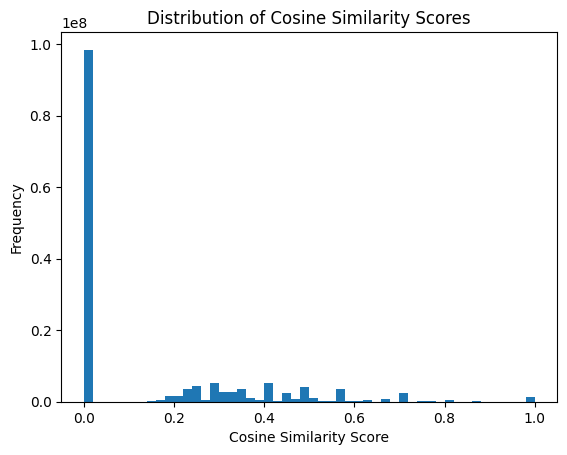

In [135]:

import matplotlib.pyplot as plt


# Example code for exploring the distribution of similarity scores:
plt.figure()
plt.hist(item_similarity_df.values.flatten(), bins=50)
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Cosine Similarity Scores')
plt.show()





In [136]:

# Example code for calculating the coverage of the recommendation system:
recommended_anime = set()
for i in range(len(item_similarity_df)):
  recommendations = recommend_similar_anime(i, similarity_threshold=0.7, top_n=5).index.tolist()
  recommended_anime.update(recommendations)

coverage = len(recommended_anime) / len(data)
print(f"Coverage of the recommendation system: {coverage:.4f}")


Coverage of the recommendation system: 0.5999


In [137]:

# 1. Can you explain the difference between user-based and item-based collaborative filtering?
# 2. What is collaborative filtering, and how does it work?


# 1. Can you explain the difference between user-based and item-based collaborative filtering?

# Answer:

# Both user-based and item-based collaborative filtering are techniques used in recommendation systems to predict user preferences based on the behavior of similar users or items. However, they differ in their approach:

# User-based collaborative filtering:

# - Identifies users with similar preferences based on their past interactions (e.g., ratings, purchases).
# - Recommends items that similar users have liked or rated highly.
# - Relies on finding users with similar taste profiles.

# Item-based collaborative filtering:

# - Identifies items with similar characteristics or user interactions (e.g., users who liked item A also liked item B).
# - Recommends items that are similar to those the user has liked or interacted with in the past.
# - Relies on finding items that are frequently consumed together or rated similarly by users.

# Key Differences:

# - User-based: Focuses on finding users with similar tastes.
# - Item-based: Focuses on finding items that are similar to those a user has already liked.

# Advantages of item-based:
# - More stable than user-based as user preferences can change frequently.
# - Easier to scale as item similarity doesn't need to be recalculated for each user.

# 2. What is collaborative filtering, and how does it work?

# Answer:

# Collaborative filtering is a technique used in recommendation systems to predict a user's preferences for items based on the preferences of other users who have similar tastes. It works by analyzing patterns of user behavior and interactions with items to identify similar users or items.

# How it Works:

# 1. Data Collection:
# - Collect data on user interactions with items, such as ratings, purchases, or views.

# 2. Similarity Calculation:
# - Calculate the similarity between users or items based on their interaction patterns.
# - Common similarity metrics include cosine similarity, Pearson correlation, or Jaccard similarity.

# 3. Prediction:
# - Based on the similarity scores, predict the user's preference for an item that they haven't interacted with before.
# - For example, if a user is similar to other users who have rated a specific item highly, the system predicts that the user would also like the item.

# 4. Recommendation:
# - Recommend items to users based on the predicted preferences.
# - The system might recommend items with high predicted ratings or items that similar users have enjoyed.

# Types of Collaborative Filtering:

# - User-based: Recommends items that similar users have liked.
# - Item-based: Recommends items that are similar to those a user has already liked.

# Advantages of Collaborative Filtering:

# - Doesn't require explicit content information about items or users.
# - Can capture complex relationships between users and items.
# - Can adapt to evolving user preferences.

# Disadvantages of Collaborative Filtering:

# - Cold-start problem: Difficulty recommending to new users or items with limited data.
# - Sparsity problem: Can be challenging with limited user-item interaction data.
# - Scalability issues: Can be computationally expensive with large datasets.
